In [145]:
import numpy as np
import tensorflow as tf
corpus_raw = "Never been tested for that.  I was hoping the full blood test would reveal a lot of things.  I am gonna find a good doctor and I will ask about it.  And yeah other than the myocarditis.  My heart has no blockages from the tests they did to me.\n\nI'm hoping my heart is healing because this esophagus thing is throwing me off.  My cardiologist is clearing me to return to work in 3 weeks, so I'm hoping I'm healing.\n\nThank you for your reply :)"


In [146]:
corpus_raw = corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = corpus_raw.lower()

In [147]:
words = []
for word in corpus_raw.split(' '):
    words.append(word)


words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
    


In [148]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [149]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


Generate training data

In [150]:
data = []
WINDOW_SIZE = 5
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

print('A look at the word pairs')     
data[:10]

A look at the word pairs


[['he', 'is'],
 ['he', 'the'],
 ['he', 'king'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'he']]

In [151]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train)
print(x_train.shape, y_train.shape)

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0.

**Make the model**

In [152]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [153]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [154]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [155]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    if _ % 100 == 0:
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  4.0349994
loss is :  1.7571597
loss is :  1.7024547
loss is :  1.6730042
loss is :  1.6542072
loss is :  1.6398301
loss is :  1.6268085
loss is :  1.6138527
loss is :  1.6006513
loss is :  1.5876542
loss is :  1.5758338
loss is :  1.5660801
loss is :  1.5586548
loss is :  1.5532161
loss is :  1.5492139
loss is :  1.5461819
loss is :  1.5438062
loss is :  1.5418919
loss is :  1.5403153
loss is :  1.5389947
loss is :  1.5378734
loss is :  1.5369102
loss is :  1.5360749
loss is :  1.5353442
loss is :  1.5347004
loss is :  1.534129
loss is :  1.5336193
loss is :  1.5331619
loss is :  1.5327495
loss is :  1.5323757
loss is :  1.532036
loss is :  1.5317258
loss is :  1.5314416
loss is :  1.5311805
loss is :  1.5309398
loss is :  1.5307171
loss is :  1.530511
loss is :  1.5303193
loss is :  1.530141
loss is :  1.5299745
loss is :  1.5298188
loss is :  1.5296727
loss is :  1.5295361
loss is :  1.5294074
loss is :  1.5292863
loss is :  1.5291718
loss is :  1.5290638
loss is :  1.5289

In [156]:
'loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train})

('loss is : ', 1.5268464)

In [157]:
vectors = sess.run(W1 + b1)
print(vectors[ word2int['queen'] ])

[-2.736077    2.8062186   3.183596    0.01743919  3.1223805 ]


In [158]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [159]:
print(int2word[find_closest(word2int['queen'], vectors)])

she


In [160]:
vectors = sess.run(W1 + b1)
print(vectors)

[[ 0.5295392  -0.5451896  -0.16969097 -1.0160415   1.5892736 ]
 [-0.49725425  0.99824333  1.1152103  -2.3213208   1.0008204 ]
 [-1.5837543   2.2088406   1.2543161   1.2206218  -0.5804225 ]
 [-0.72303563  1.0704036  -0.32942784  0.32001567  2.528164  ]
 [-2.736077    2.8062186   3.183596    0.01743919  3.1223805 ]
 [-3.6587863  -1.0808156   3.167647   -1.5710714   2.0218534 ]
 [-1.8690959  -2.0187182   0.7455045   0.51763034  0.28952694]
 [-2.3066306  -0.6539742   2.2283645  -0.36019272  2.9689565 ]
 [-0.39887297  1.088914    4.094547    0.8547706   2.9263477 ]]


In [161]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [162]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

 0.76670915
the -0.758998
king -0.9981212
is -0.6416782
queen 0.9291776
. -0.5889759
he 0.20023805
royal -0.0108503215
she -0.16225831


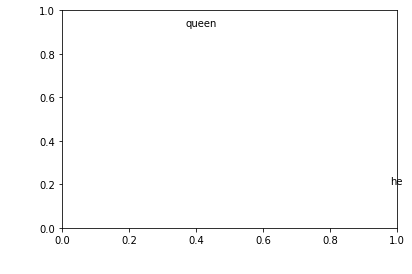

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()